In [1]:
import lib
import matplotlib
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

DATA_DIR = os.path.join(lib.basic.DATA_DIR(), 'myelin_grad')

pixdim[1,2,3] should be non-zero; setting 0 dims to 1


# Subject ages

In [ ]:
plt.style.use('ggplot')
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
axes[0].hist(lib.basic.SUB_INFO_DF['Age in months'], color='#923a60')
axes[0].set_title('Age in months')
axes[1].hist(lib.basic.SUB_INFO_DF['Age in years'], bins=17, color='#2c80c5')
axes[1].set_title('Age in years')
fig.tight_layout()
plt.show()

# Inter-group correlations

In [2]:
# Loading myelination maps
regions = ['cb', 'cc', 'sc']
maps = {region: pd.read_pickle(os.path.join(DATA_DIR, f'{region}_maps.pickle')) for region in regions}
mean_maps = {}

In [3]:
matplotlib.rcParams.update(matplotlib.rcParamsDefault)
mean_maps['cb'] = lib.myelin.get_mean_maps_of_ages(maps['cb'], remove_outliers=False)

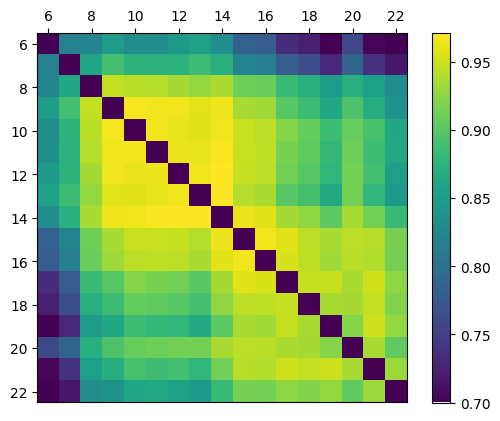

In [4]:
lib.util.plot_corr_mat(mean_maps['cb'], 0.7, fname='figures/myelin_grad/cb_corr.svg')

In [5]:
matplotlib.rcParams.update(matplotlib.rcParamsDefault)
mean_maps['cc'] = lib.myelin.get_mean_maps_of_ages(maps['cc'])

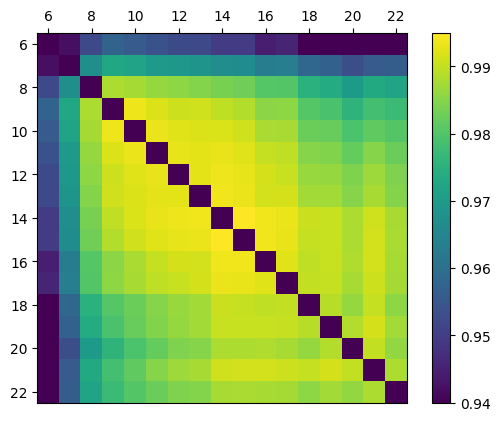

In [8]:
lib.util.plot_corr_mat(mean_maps['cc'], 0.94, fname='figures/myelin_grad/cc_corr.svg')

In [9]:
matplotlib.rcParams.update(matplotlib.rcParamsDefault)
mean_maps['sc'] = lib.myelin.get_mean_maps_of_ages(maps['sc'])

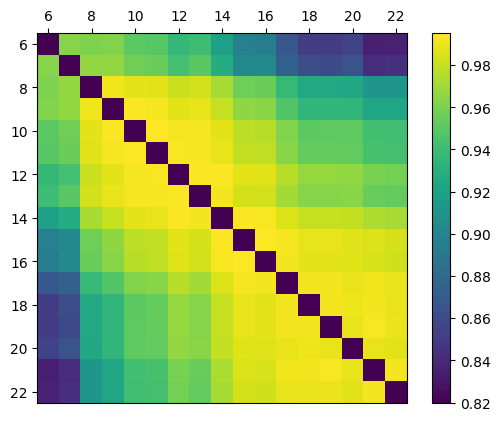

In [13]:
lib.util.plot_corr_mat(mean_maps['sc'], 0.82, fname='figures/myelin_grad/sc_corr.svg')

# Distribution of an example myelin map

In [ ]:
plt.style.use('ggplot')
plt.figure()
plt.hist(mean_maps['cb'][7], bins=14)
plt.show()

In [ ]:
# group6_maps = np.row_stack(maps['cb'][maps['cb']['age'] == 6]['data'])
# np.where(group6_maps > 20)
# DIY_COLOURS = ['#923a60', '#2c80c5']

# Mean cerebellum myelin maps for each age

In [14]:
import nibabel
for age, arr in mean_maps['cb'].items():
    cb_mean_map = lib.myelin.invert_map(arr, lib.myelin.get_cb_map)
    flat_map = lib.preprocess.rescale(cb_mean_map.reshape(-1, 1), 1, 2)
    nibabel.save(lib.niio.get_volume_obj(flat_map.reshape(cb_mean_map.shape)), os.path.join(DATA_DIR, f'CB-Mean-{age}.nii'))

/nfs/e2/workingshop/dengguangyu/HCP/lib/myelin.py:46: RuntimeWarning: Mean of empty slice
  new_val = np.nanmean(myelin_map[xl: xu, yl: yu, zl: zu])
